In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

22.431172070827756 152.61095269745027
78.13418866919167 -15.924246050526193
-58.957165258537884 -119.67958364687749
27.91433400440097 -89.40498625616931
57.1215526584767 -125.07639895680728
-45.81272758795215 123.63407383902586
-21.138323201393277 -143.66968884180983
17.98560983793527 116.0118333787226
19.745236742862275 -178.00346444573648
-61.70483060042428 -55.498496787172954
-14.801280665304617 22.927355112977892
66.53850755186292 -161.7651692242845
27.97487898217024 85.53820951600721
-6.5042572661383105 -106.85563248806606
-5.656629740839435 35.74865232589843
41.73929993324063 -32.62459245739484
28.63532702620995 -59.6130833982201
19.116114034051336 -167.2674054853783
33.679387406067306 -155.71692569066306
8.705971685752615 -102.37877681666751
86.91420776161186 124.35547086944263
66.81600272331696 9.300109263398497
30.254392172697436 81.69022474672784
67.24823687289376 68.95985337495722
48.041931494540876 -62.89942428576788
82.17168587647296 53.048380325964956
9.446177088194844 86

In [5]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
#Import the requests library
import requests

#Import the API key
from config import weather_api_key

In [8]:
#Starting URL for Weather Map API call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

In [15]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | estelle
Processing Record 5 of Set 1 | mackenzie
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | catuday
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kalabo
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | bhaktapur
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | msanga
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | saint george
Processing Record 18 of Set 1 | acapulco
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | rorvik
Processing Record 21 of Set 1 | jumla
Processing Record 22 of Set 1 | aksarka
Processing Record 2

Processing Record 37 of Set 4 | uvira
Processing Record 38 of Set 4 | atar
Processing Record 39 of Set 4 | tuktoyaktuk
Processing Record 40 of Set 4 | qasigiannguit
Processing Record 41 of Set 4 | whitefish
Processing Record 42 of Set 4 | canutama
Processing Record 43 of Set 4 | ziarat
Processing Record 44 of Set 4 | monrovia
Processing Record 45 of Set 4 | alexandria
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | brandfort
Processing Record 48 of Set 4 | valdosta
Processing Record 49 of Set 4 | ponta delgada
Processing Record 50 of Set 4 | east london
Processing Record 1 of Set 5 | rio gallegos
Processing Record 2 of Set 5 | lavrentiya
Processing Record 3 of Set 5 | puerto leguizamo
Processing Record 4 of Set 5 | matsanga
City not found. Skipping...
Processing Record 5 of Set 5 | richards bay
Processing Record 6 of Set 5 | umm kaddadah
Processing Record 7 of Set 5 | lamu
Processing Record 8 of Set 5 | xining
Processing Record 9 of Set 5 | bilma
Processing Record

Processing Record 29 of Set 8 | kaya
Processing Record 30 of Set 8 | namatanai
Processing Record 31 of Set 8 | nanortalik
Processing Record 32 of Set 8 | sinop
Processing Record 33 of Set 8 | pandan
Processing Record 34 of Set 8 | akhtubinsk
Processing Record 35 of Set 8 | nyurba
Processing Record 36 of Set 8 | aksu
Processing Record 37 of Set 8 | viking
Processing Record 38 of Set 8 | nizhniy odes
Processing Record 39 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 40 of Set 8 | kholodnyy
Processing Record 41 of Set 8 | nizwa
Processing Record 42 of Set 8 | samusu
City not found. Skipping...
Processing Record 43 of Set 8 | gambela
Processing Record 44 of Set 8 | tokmak
Processing Record 45 of Set 8 | malwan
City not found. Skipping...
Processing Record 46 of Set 8 | port hueneme
Processing Record 47 of Set 8 | yokadouma
Processing Record 48 of Set 8 | mrirt
City not found. Skipping...
Processing Record 49 of Set 8 | shingu
Processing Record 50 of Set 8 | katangli
Pr

Processing Record 20 of Set 12 | iqaluit
Processing Record 21 of Set 12 | vila velha
Processing Record 22 of Set 12 | craig
Processing Record 23 of Set 12 | padang
Processing Record 24 of Set 12 | corn island
Processing Record 25 of Set 12 | dingle
Processing Record 26 of Set 12 | knysna
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | iskateley
Processing Record 29 of Set 12 | ramhormoz
Processing Record 30 of Set 12 | eureka
Processing Record 31 of Set 12 | hamadan
Processing Record 32 of Set 12 | shakawe
Processing Record 33 of Set 12 | itapetininga
Processing Record 34 of Set 12 | atbasar
Processing Record 35 of Set 12 | zverinogolovskoye
Processing Record 36 of Set 12 | wuning
Processing Record 37 of Set 12 | coihaique
Processing Record 38 of Set 12 | gari
Processing Record 39 of Set 12 | shelburne
Processing Record 40 of Set 12 | derbent
Processing Record 41 of Set 12 | cadillac
Processing Record 42 of Set 12 | vardo
Processing Record 43 of Set 12 | cam 

In [16]:
len(city_data)

583

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,56.32,71,0,10.45,JP,2022-12-10 15:57:57
1,Rikitea,-23.1203,-134.9692,75.92,75,83,16.24,PF,2022-12-10 16:02:17
2,Estelle,29.8458,-90.1067,73.99,84,75,3.44,US,2022-12-10 16:02:17
3,Mackenzie,55.2999,-123.1698,10.18,89,100,7.94,CA,2022-12-10 16:02:17
4,Esperance,-33.8667,121.9000,58.77,69,100,13.02,AU,2022-12-10 16:00:01
5,Mataura,-46.1927,168.8643,49.37,99,98,0.67,NZ,2022-12-10 16:02:18
6,Catuday,16.2923,119.8062,78.66,80,100,21.12,PH,2022-12-10 16:02:19
7,Kapaa,22.0752,-159.3190,73.09,80,97,18.41,US,2022-12-10 15:54:40
8,Ushuaia,-54.8000,-68.3000,50.04,54,62,7.23,AR,2022-12-10 16:01:57
9,Kalabo,-14.9700,22.6814,79.77,56,88,2.73,ZM,2022-12-10 16:02:19


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

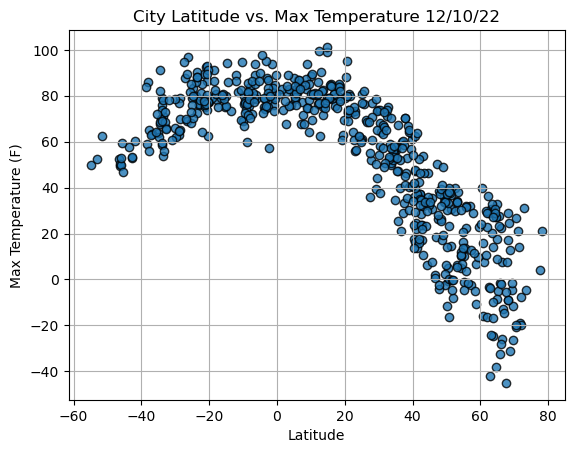

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

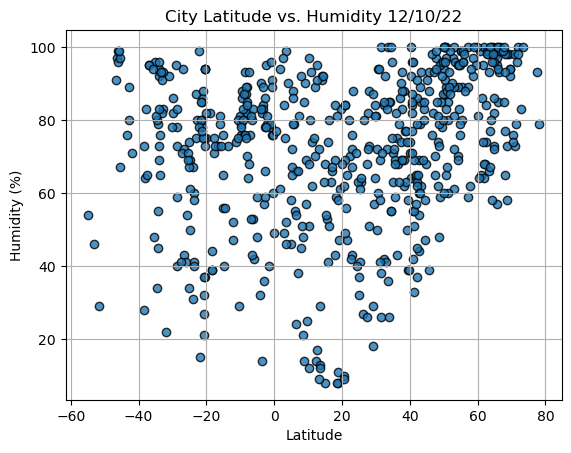

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")

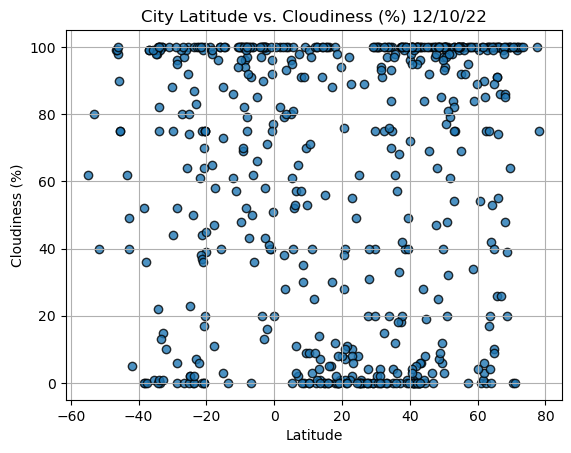

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

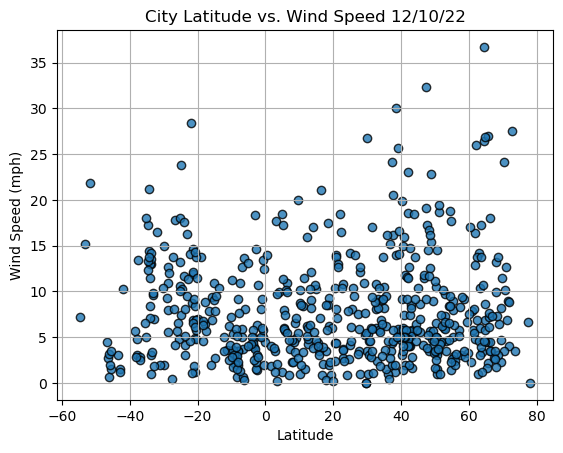

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

In [32]:
#Import linear regression from the SciPy stats modules.
from scipy.stats import linregress

In [33]:
#Import Matplotlib.
import matplotlib.pyplot as plt

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)


In [37]:
index13 = city_data_df.loc[13]
index13

City                       Msanga
Lat                         -6.05
Lng                       36.0333
Max Temp                    80.37
Humidity                       42
Cloudiness                     36
Wind Speed                    8.1
Country                        TZ
Date          2022-12-10 16:02:21
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
578     True
579     True
580     True
581     True
582     True
Name: Lat, Length: 583, dtype: bool

In [40]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,56.32,71,0,10.45,JP,2022-12-10 15:57:57
2,Estelle,29.8458,-90.1067,73.99,84,75,3.44,US,2022-12-10 16:02:17
3,Mackenzie,55.2999,-123.1698,10.18,89,100,7.94,CA,2022-12-10 16:02:17
6,Catuday,16.2923,119.8062,78.66,80,100,21.12,PH,2022-12-10 16:02:19
7,Kapaa,22.0752,-159.3190,73.09,80,97,18.41,US,2022-12-10 15:54:40


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

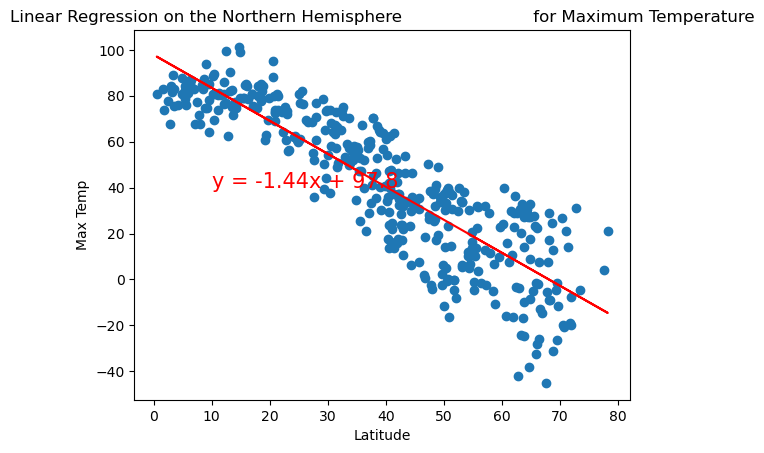

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

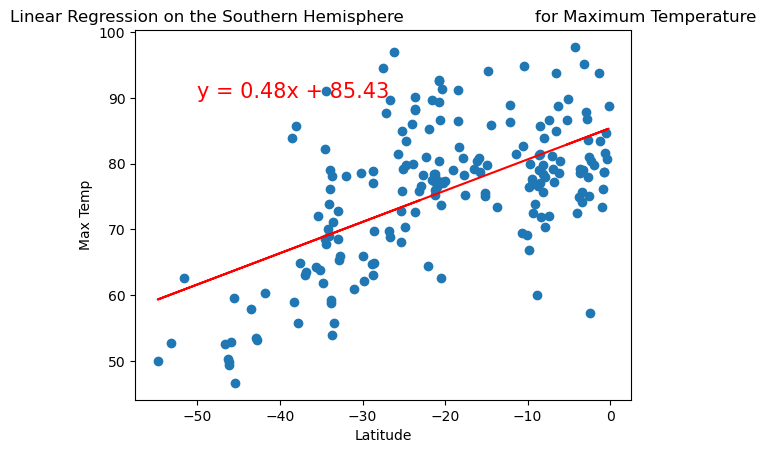

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

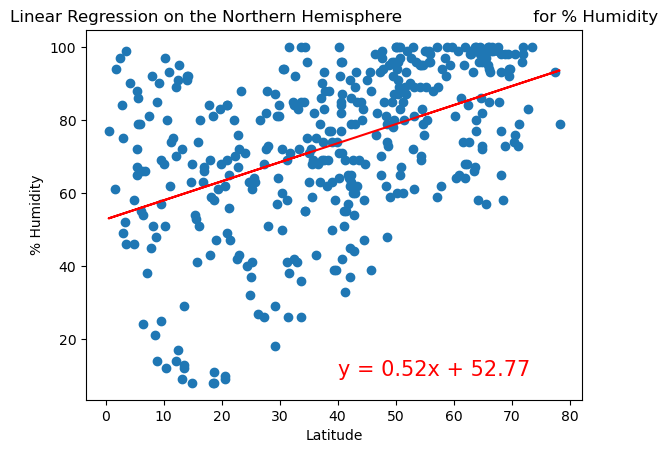

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

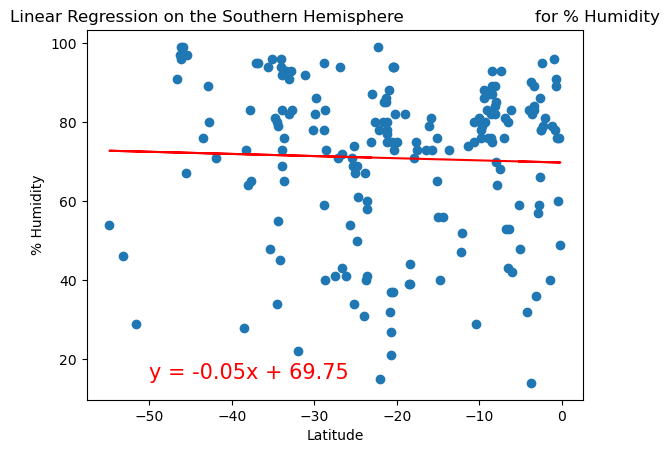

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

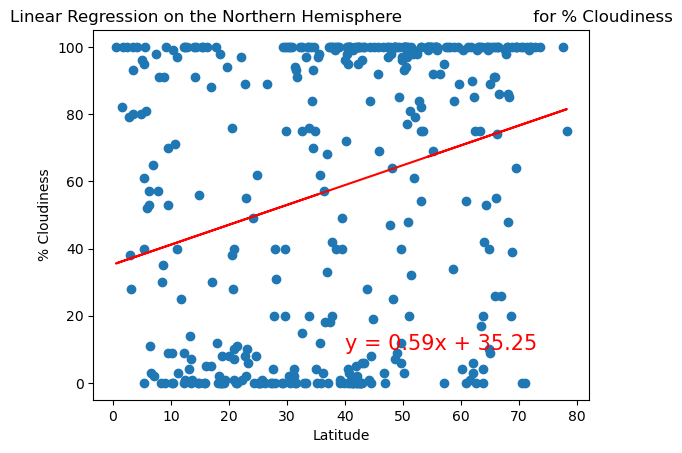

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

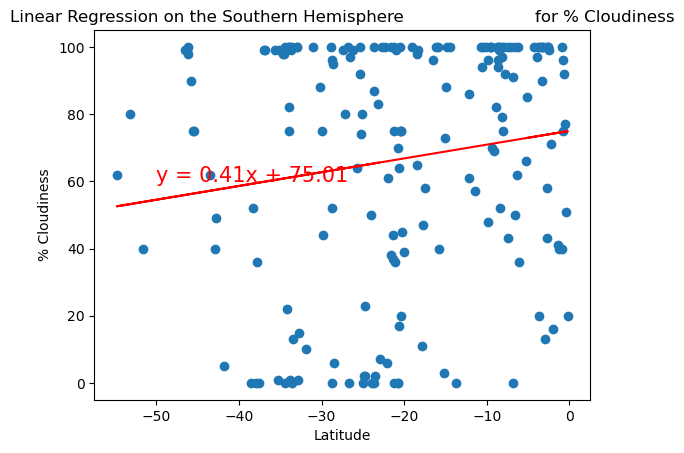

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

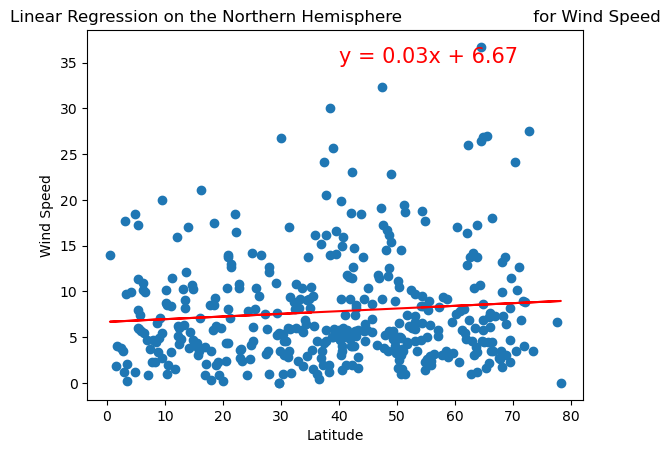

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

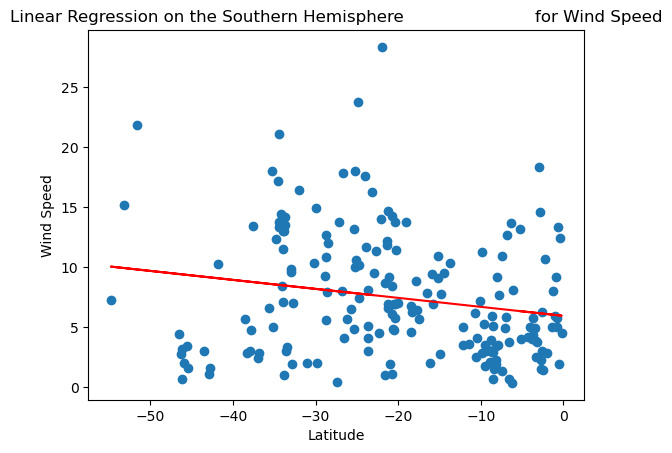

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
cd